# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

# Importing Libraries

In [147]:
import warnings
warnings.filterwarnings('ignore')
from platform import version
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
le = LabelEncoder()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


# Version Control

In [148]:
print(f'Python Version: {version()}')
print(f'Pandas Version: {pd.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')
print(f'Seaborn Version: {sns.__version__}')

Python Version: 10.0.22621
Pandas Version: 1.3.4
Matplotlib Version: 3.4.3
Seaborn Version: 0.11.2


In [149]:

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv', index_col = 'Unnamed: 0')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv', index_col = 'Unnamed: 0')

---
## For Data 1

In [150]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data1['X'], data1['y'], test_size=0.2, random_state=100)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a linear regression model
model = LinearRegression()
_ = model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Mean Squared Error is: {mean_squared_error(preds, y_test)}')
print(f'R2 score is: {r2_score(preds, y_test)}')

Mean Squared Error is: 76.0784574750954
R2 score is: 0.986107395365314


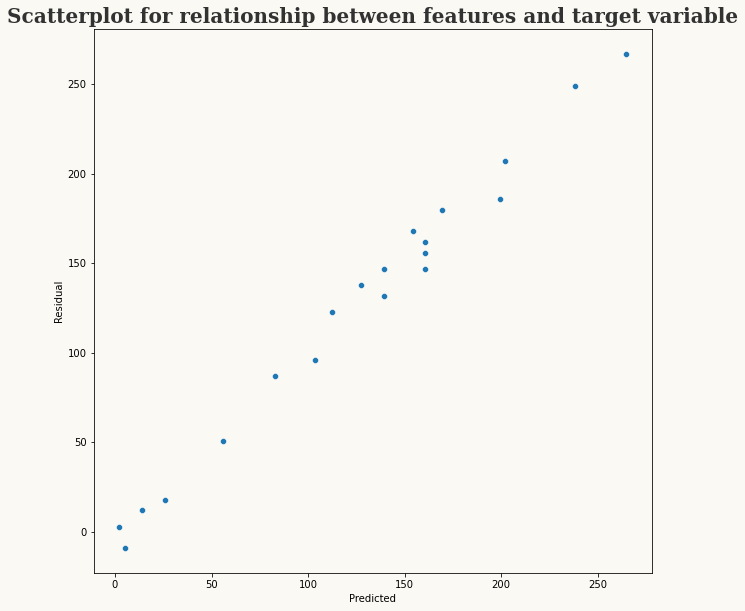

In [151]:
## create residual plots

color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (10, 10))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color

sns.scatterplot(x = preds, y = y_test, ax = ax0)
plt.ylabel('Residual')
plt.xlabel('Predicted')

_ = plt.title('Scatterplot for relationship between features and target variable',fontsize=20, y = 1, x = 0.5, fontweight='bold', fontfamily='serif', color="#323232")

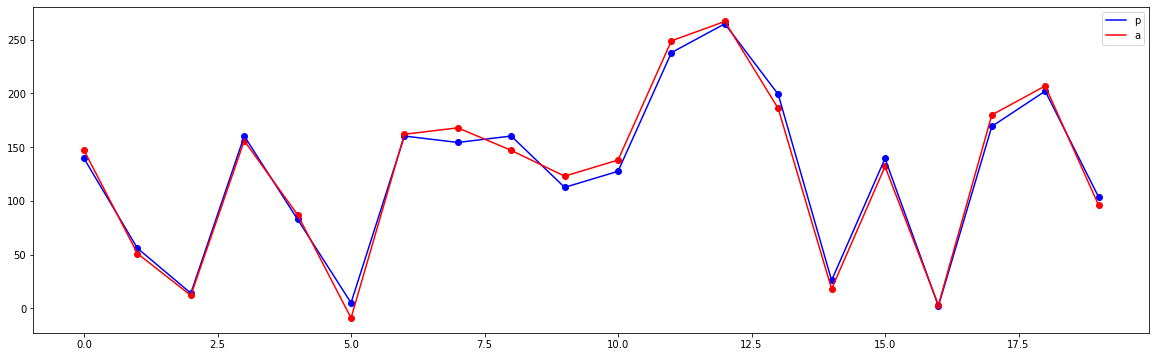

In [152]:
plt.figure(figsize=(20,6))
plt.scatter(range(len(preds)),preds, c = 'blue')
plt.plot(range(len(preds)),preds, c = 'blue')


plt.scatter(range(len(y_test)),y_test, c = 'red')
plt.plot(range(len(preds)),y_test, c = 'red')
plt.legend("pa")

### Findings
The model is performing good. Predicted values are completely correlated with the actual values.

---
# Data 2

#### Data Preprocesing

In [153]:
data2['X2'].replace({'A':0, 'B':1}, inplace = True)

In [154]:
features = [col for col in data2.columns if col not in ['X2_B']]

In [155]:
data2

,X1,X2,y
0,50,1,2510
1,82,1,6738
2,66,1,4355
3,35,0,2225
4,81,0,7560
...,...,...,...
95,98,1,9615
96,9,0,1066
97,56,0,4139
98,50,1,2502


In [156]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data2[features], data2['y'], test_size=0.2, random_state=100)

# Train a linear regression model
model = LinearRegression()
_ = model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Mean Squared Error is: {mean_squared_error(preds, y_test)}')
print(f'R2 score is: {r2_score(preds, y_test)}')

Mean Squared Error is: 5.32324127704044e-25
R2 score is: 1.0


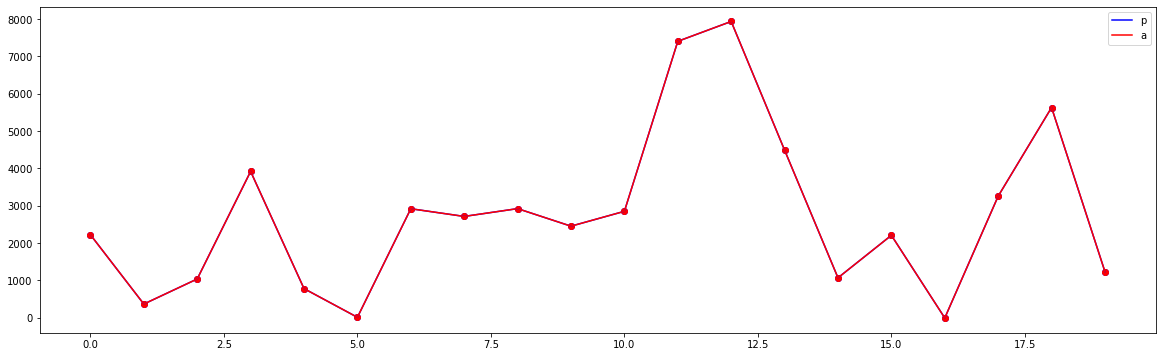

In [157]:
plt.figure(figsize=(20,6))
plt.scatter(range(len(preds)),preds, c = 'blue')
plt.plot(range(len(preds)),preds, c = 'blue')


plt.scatter(range(len(y_test)),y_test, c = 'red')
plt.plot(range(len(preds)),y_test, c = 'red')
plt.legend("pa")

### Findings

The model is performing perfectly.